In [2]:
import kagglehub

# Download dataset (latest version)
path = kagglehub.dataset_download("constantinwerner/cyrillic-handwriting-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.51G/1.51G [00:16<00:00, 96.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/constantinwerner/cyrillic-handwriting-dataset/versions/5


In [3]:
print(path)
!cd "{path}" && ls

/root/.cache/kagglehub/datasets/constantinwerner/cyrillic-handwriting-dataset/versions/5
test  test.tsv	train  train.tsv


In [4]:
import os, glob
from PIL import Image
import matplotlib.pyplot as plt

train_imgs = sorted(glob.glob(os.path.join(path, "train", "*.*")))
test_imgs = sorted(glob.glob(os.path.join(path, "test", "*.*")))

num train images: 72286
num test images: 1544
example: /root/.cache/kagglehub/datasets/constantinwerner/cyrillic-handwriting-dataset/versions/5/train/aa1.png
type: <class 'str'>


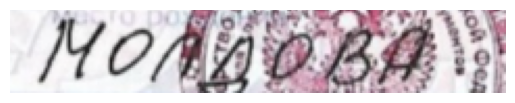

In [5]:
print("num train images:", len(train_imgs))
print("num test images:", len(test_imgs))
print("example:", train_imgs[0])
print("type:", type(train_imgs[0]))

sample = Image.open(train_imgs[0])
plt.imshow(sample, cmap="gray")
plt.axis("off")
plt.show()

In [6]:
from collections import Counter
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import cv2

def process_data(image_dir, labels_dir, ignore = []):
    """
    image_dir: path to image directory (str)
    labels_dir: path to tsv files (str)
    """
    """
    img2label: {image_name:corresponding_label, }
    chars: all unique chars (list)
    all_labels: (list)
    """
    chars = []
    img2label = dict()
    raw = open(labels_dir, "r", encoding = "utf-8").read()
    temp = raw.split("\n")
    for row in temp:
        try:
            # row_list: ['aa1.png', 'Молдова', ...]
            row_list = row.split("\t")
            # check ignore
            flag = False
            for item in ignore:
                if item in row_list[1]:
                    flag = True
            if flag == False:
                img2label[os.path.join(image_dir, row_list[0])] = row_list[1]
                for char in row_list[1]:
                    if char not in chars:
                        chars.append(char)
        except:
            print("ValueError:", row_list)
            pass
    all_labels = list(img2label.values())
    chars = sorted(chars)
    return img2label, chars, all_labels

def generate_images(img_paths):
    """
    img_paths: string paths to images (list[str])
    """
    """
    data_images: list[np.array]
    """
    data_images = []
    for path in tqdm(img_paths):
        # img shape: H,W,3
        img = cv2.imread(path)
        try:
            data_images.append(img.astype("uint8"))
        except:
            img = process_image(img)
    return data_images

In [7]:
TRAIN_IMAGE_DIR = os.path.join(path, "train")
TRAIN_LABELS_DIR = os.path.join(path, "train.tsv")

TEST_IMAGE_DIR = os.path.join(path, "test")
TEST_LABELS_DIR = os.path.join(path, "test.tsv")

img2label_train, chars_train, all_words_train = process_data(TRAIN_IMAGE_DIR, TRAIN_LABELS_DIR)
img2label_test, chars_test, all_words_test = process_data(TEST_IMAGE_DIR, TEST_LABELS_DIR)

# combine
img2label = {**img2label_train, **img2label_test}
chars = chars_train + chars_test

image_names = list(img2label.keys())
labels = list(img2label.values())

images = generate_images(image_names)


ValueError: ['']


100%|██████████| 73830/73830 [01:03<00:00, 1162.03it/s]


In [15]:
# amount of labels
N = len(labels)

# max label length
max_len = 0
for label in labels:
    if len(label) > max_len:
        max_len = len(label)

# distribution of label lengths
counter_length = dict(Counter(len(label) for label in labels))

# sorted labels frequencies
label_freq = sorted(Counter(labels).items(),
                    key = lambda item: item[1])

# character frequency distribution
all_chars = Counter("".join(labels))
chars_freq = sorted(all_chars.items(), key = lambda item: item[1])

In [30]:
print("Size of dataset:", N)
print("Max length of expression:", max_len)
print("The most common char:", chars_freq[-1])
print("The least common char:", chars_freq[0])
print("The most common expression:", label_freq[-1])
print("The least common expression:", label_freq[0])

Size of dataset: 73830
Max length of expression: 40
The most common char: ('о', 56736)
The least common char: ('x', 1)
The most common expression: ('что', 351)
The least common expression: ('продолжила борьбу', 1)


<BarContainer object of 107 artists>

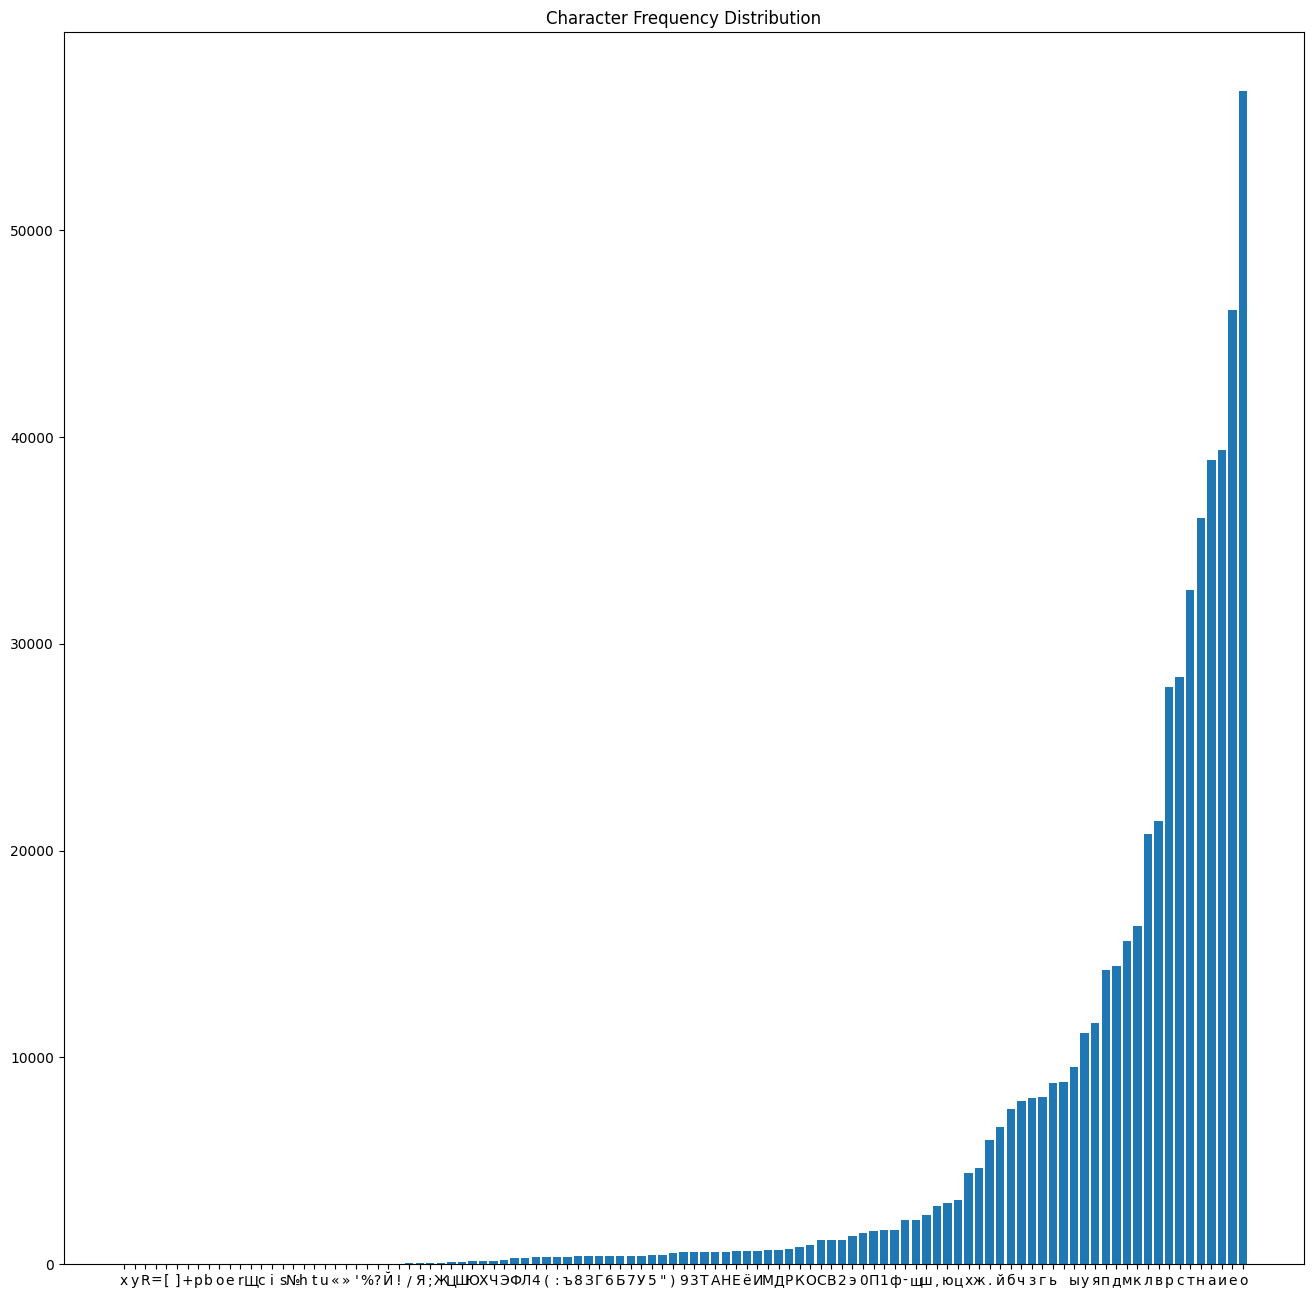

In [36]:
plt.figure(figsize = (16, 16))
plt.title("Character Frequency Distribution")
plt.bar(dict(chars_freq).keys(), dict(chars_freq).values())

<BarContainer object of 39 artists>

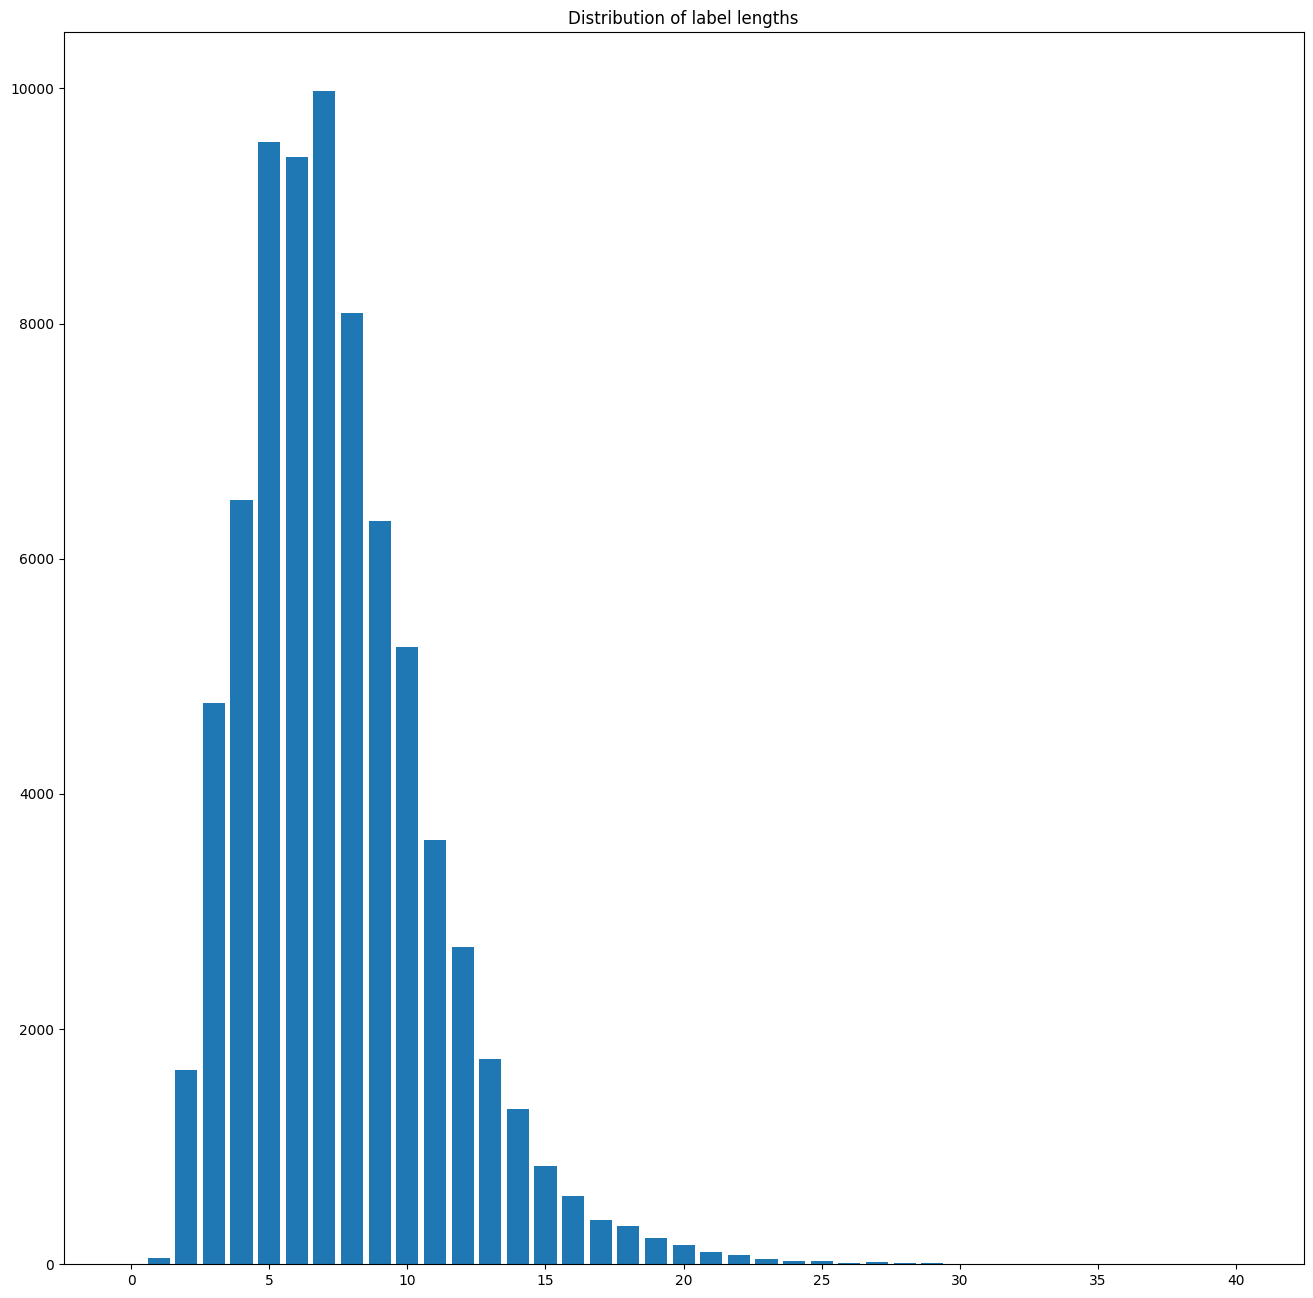

In [41]:
plt.figure(figsize = (16, 16))
plt.title("Distribution of label lengths")
plt.bar(dict(counter_length).keys(), dict(counter_length).values())

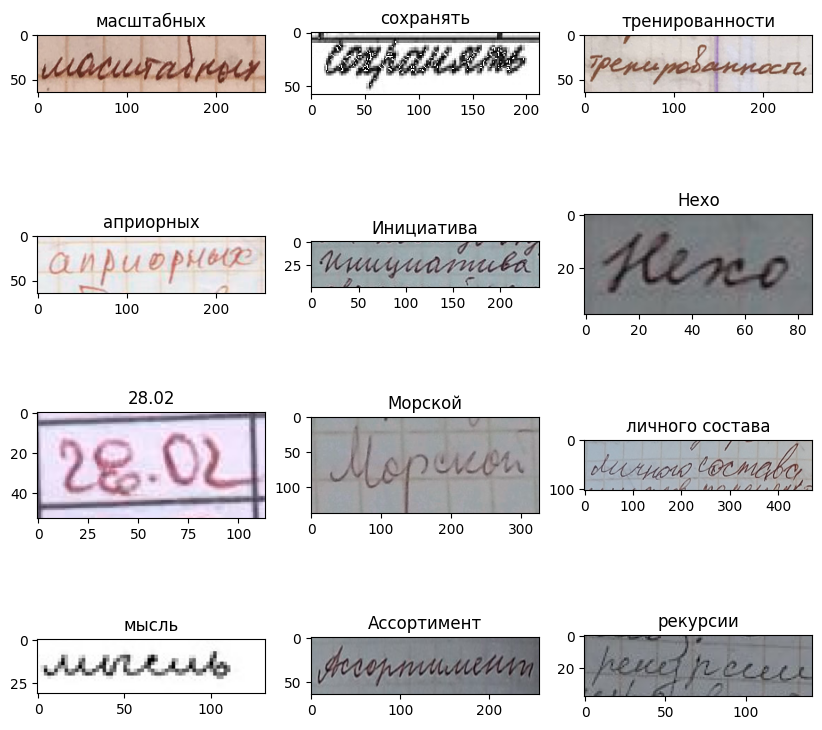

In [55]:
# See some random images
N_examples = 12
samples = []

for _ in range(N_examples):
    i = random.randint(0, len(images))
    img = images[i]
    label = labels[i]
    samples.append([img, label])

figure = plt.figure(figsize = (10, 10))
rows = 4
columns = 3
for i, (img, label) in enumerate(samples):
    sub_figure = figure.add_subplot(rows, columns, i + 1)
    plt.imshow(img)
    sub_figure.set_title(label)
